# EE4375-2022: Extension to Sixth Lab Session to second order elements: 4-element/13-node mesh 

Second order triangular elements on unit square with mesh with only 4 triangles and 13 (4+4+4+1) nodes. 4 nodes are the vertices of square, 4 nodes are the midpoints on the edges of the square, 4 nodes are the midpoints of the internal edges of the square and 1 node in the common (central) node of the triangles. 

## Import Packages

In [41]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
using SparseArrays 
using Plots
using LaTeXStrings

In [42]:
include("quadrature.jl")

compute_weights_triangle

## Section 1: Geometry and Mesh Generation of Unit Square Geometry
Here we ask GMSH to generate a second order mesh. We set the parameter lc to a ridiculously large value to generate the coarsest possible mesh.  

In [43]:
#..1/4: initialize gmsh 
gmsh.initialize()

#..2/4: generate geometry 
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("square")
#..set mesh density parameter 
lc = 5.
#..define four points via (x,y,z) coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
#..define four edges by connecting point labels pairwise  
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
#..define curved loop by connecting four edge labels  
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
#..define surface by curved loop 
gmsh.model.geo.addPlaneSurface([1], 1)
#..give label to the surface 
#..syntax of the function being used is gmsh.model.setPhysicalName(dim, tag, name) 
gmsh.model.setPhysicalName(2, 1, "My surface")
#..synchronize model 
gmsh.model.geo.synchronize()

#..3/4: generate two-dimensional mesh 
gmsh.option.setNumber("Mesh.ElementOrder", 2)
gmsh.option.setNumber("Mesh.SecondOrderLinear", 1)
gmsh.model.mesh.generate(2)
#..if true, write mesh to file for further processing 
if (true) gmsh.write("square-2nd.msh") end 
#..if true, visualize mesh through the GUI 
if (false) gmsh.fltk.run() end 

#..4/4: finalize gmsh 
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00284263s, CPU 0.000291s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00313083s, CPU 0.000163s)
Info    : Meshing order 2 (curvilinear off)...
Info    : [  0%] Meshing curve 1 order 2
Info    : [ 20%] Meshing curve 2 order 2
Info    : [ 40%] Meshing curve 3 order 2
Info    : [ 60%] Meshing curve 4 order 2
Info    : [ 80%] Meshing surface 1 order 2
Info    : Surface mesh: worst distortion = 1 (0 elements in ]0, 0.2]); worst gamma = 0.828427
Info    : Done meshing order 2 (Wall 0.00123421s, CPU 5.9e-05s)
Info    : 13 nodes 12 elements
Info    : Writing 'square-2nd.msh'...
Info    : Done writing 'square-2nd.msh'


## Section 2:/ Read Mesh from file and perform loop over the elements
In this section we retrieve information for the GMSH data structure and find out where GMSH stores a lot of its goodies. 

### Section 1.2/ Loop over 2D (triangular, surface) elements 
Note how each 2D element is connected to six (6) nodes and how in total 13 nodes appear. 

In [34]:
#..1/5: Finalize gmsh
gmsh.initialize()

#..2/5: Read mesh from file
gmsh.open("square-2nd.msh")

#..3/5: retrieve number of triangular elements on the 2D surface and their connectivity 
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..4/5: perform loop over the 2D elemements 
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][6*(element_id-1)+1]
    node2_id = element_connectivity[1][6*(element_id-1)+2]
    node3_id = element_connectivity[1][6*(element_id-1)+3]
    node4_id = element_connectivity[1][6*(element_id-1)+4]
    node5_id = element_connectivity[1][6*(element_id-1)+5]
    node6_id = element_connectivity[1][6*(element_id-1)+6]    

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " node-4 has global number ", node4_id)
    println("on element ", element_id, " node-5 has global number ", node5_id)
    println("on element ", element_id, " node-6 has global number ", node6_id)
    println(" ")

end 

#..5/5: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 13 nodes
Info    : 12 elements
Info    : Done reading 'square-2nd.msh'
on element 1 node-1 has global number 1
on element 1 node-2 has global number 2
on element 1 node-3 has global number 9
on element 1 node-4 has global number 5
on element 1 node-5 has global number 10
on element 1 node-6 has global number 11
 
on element 2 node-1 has global number 4
on element 2 node-2 has global number 1
on element 2 node-3 has global number 9
on element 2 node-4 has global number 8
on element 2 node-5 has global number 11
on element 2 node-6 has global number 12
 
on element 3 node-1 has global number 2
on element 3 node-2 has global number 3
on element 3 node-3 has global number 9
on element 3 node-4 has global number 6
on element 3 node-5 has global number 13
on element 3 node-6 has global number 10
 
on element 4 node-1 has global number 3
on element 4 node-2 has global number 4
on element 4 node-3 has global number 9
on eleme

### Section 2.2/ Loop over 1D (line, boundary) elements and construct array of boundary indices (to be editted as a function taking the mesh as an input)

In [12]:
#..1/6: Finalize gmsh
gmsh.initialize()

#..2/6: Read mesh from file
gmsh.open("square-2nd.msh")

#..3/6: perform loop over the 1D elemements and construct I_bnd  
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(1)
nelements = length(element_ids[1])

#..4/6: initialize vector of boundaryv indices (to be editted to avoid allocations withoi)
bnd_node_ids = Vector{Int64}([])

#..5/6: retrieve number of triangular elements on the 2D surface and their connectivity
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println(" ")

    union!(bnd_node_ids,node1_id, node3_id, node3_id)
    
end 

#..6/6: Finalize gmsh
gmsh.finalize()

display(bnd_node_ids)

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 13 nodes
Info    : 12 elements
Info    : Done reading 'square-2nd.msh'
on element 1 node-1 has global number 1
on element 1 node-2 has global number 2
on element 1 node-3 has global number 5
 
on element 2 node-1 has global number 2
on element 2 node-2 has global number 3
on element 2 node-3 has global number 6
 
on element 3 node-1 has global number 3
on element 3 node-2 has global number 4
on element 3 node-3 has global number 7
 
on element 4 node-1 has global number 4
on element 4 node-2 has global number 1
on element 4 node-3 has global number 8
 


8-element Vector{Int64}:
 1
 5
 2
 6
 3
 7
 4
 8

### Section 3.2/ Lookup of the number of nodes
Retrieve the number of nodes from the mesh. Note that we include the nodes on the boundary. 

In [52]:
#..1/4: Finalize gmsh
gmsh.initialize()

#..2/4: Read mesh from file
gmsh.open("square-2nd.msh")

#..3/4: look-up of the number of nodes 
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
println(" getNodes() results in ", nnodes, " nodes \n")

node_ids, node_coord, _ = gmsh.model.mesh.getNodes(2)
nnodes = length(node_ids)
println(" getNodes(2) results in ", nnodes, " nodes \n")

node_ids, node_coord, _ = gmsh.model.mesh.getNodes(2,-1, true)
nnodes = length(node_ids)
println(" getNodes(2,-1, true) results in ", nnodes, " nodes \n")

node_ids, node_coord, _ = gmsh.model.mesh.getNodes(1)
nnodes = length(node_ids)
println(" getNodes(1) results in ", nnodes, " nodes \n")

#..4/4: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 13 nodes
Info    : 12 elements
Info    : Done reading 'square-2nd.msh'
 getNodes() results in 13 nodes 

 getNodes(2) results in 5 nodes 

 getNodes(2,-1, true) results in 13 nodes 

 getNodes(1) results in 4 nodes 



### Section 4.2/ Additional Information on GMSH 
Here we provide pointers to retrieve even more information. 

In [9]:
?gmsh.model.mesh.getElements

```
gmsh.model.mesh.getElements(dim = -1, tag = -1)
```

Get the elements classified on the entity of dimension `dim` and tag `tag`. If `tag` < 0, get the elements for all entities of dimension `dim`. If `dim` and `tag` are negative, get all the elements in the mesh. `elementTypes` contains the MSH types of the elements (e.g. `2` for 3-node triangles: see `getElementProperties` to obtain the properties for a given element type). `elementTags` is a vector of the same length as `elementTypes`; each entry is a vector containing the tags (unique, strictly positive identifiers) of the elements of the corresponding type. `nodeTags` is also a vector of the same length as `elementTypes`; each entry is a vector of length equal to the number of elements of the given type times the number N of nodes for this type of element, that contains the node tags of all the elements of the given type, concatenated: [e1n1, e1n2, ..., e1nN, e2n1, ...].

Return `elementTypes`, `elementTags`, `nodeTags`.


In [10]:
?gmsh.model.mesh.getElementProperties(9)

```
gmsh.model.mesh.getElementProperties(elementType)
```

Get the properties of an element of type `elementType`: its name (`elementName`), dimension (`dim`), order (`order`), number of nodes (`numNodes`), local coordinates of the nodes in the reference element (`localNodeCoord` vector, of length `dim` times `numNodes`) and number of primary (first order) nodes (`numPrimaryNodes`).

Return `elementName`, `dim`, `order`, `numNodes`, `localNodeCoord`, `numPrimaryNodes`.


In [24]:
?gmsh.model.mesh.getNodes

```
gmsh.model.mesh.getNodes(dim = -1, tag = -1, includeBoundary = false, returnParametricCoord = true)
```

Get the nodes classified on the entity of dimension `dim` and tag `tag`. If `tag` < 0, get the nodes for all entities of dimension `dim`. If `dim` and `tag` are negative, get all the nodes in the mesh. `nodeTags` contains the node tags (their unique, strictly positive identification numbers). `coord` is a vector of length 3 times the length of `nodeTags` that contains the x, y, z coordinates of the nodes, concatenated: [n1x, n1y, n1z, n2x, ...]. If `dim` >= 0 and `returnParamtricCoord` is set, `parametricCoord` contains the parametric coordinates ([u1, u2, ...] or [u1, v1, u2, ...]) of the nodes, if available. The length of `parametricCoord` can be 0 or `dim` times the length of `nodeTags`. If `includeBoundary` is set, also return the nodes classified on the boundary of the entity (which will be reparametrized on the entity if `dim` >= 0 in order to compute their parametric coordinates).

Return `nodeTags`, `coord`, `parametricCoord`.


## Section 3:/ Extract Data from the Mesh and Perform a FEM Computation 

In [13]:
function area_triangle(x1,x2,x3,y1,y2,y3)
    x12 = x2 - x1; x13 = x3-x1;
    y12 = y2 - y1; y13 = y3-y1;
    area_id = x12*y13 - x13*y12; 
    area_id = abs(area_id)/2
    return area_id 
end

area_triangle (generic function with 1 method)

In [14]:
# polynomial degree to FE approximation  
pdegree = 1;
# degree of numerical quadrature 
qorder = 6; 
xi = compute_coordinates_triangle(qorder)
w  = compute_weights_triangle(qorder)
display(xi)
display(w)

16-element Vector{Vector{Float64}}:
 [0.06943184420297371, 0.06461106321354769]
 [0.06943184420297371, 0.30709631153115907]
 [0.06943184420297371, 0.6234718442658671]
 [0.06943184420297371, 0.8659570925834785]
 [0.33000947820757187, 0.046518677526560935]
 [0.33000947820757187, 0.22110322250073802]
 [0.33000947820757187, 0.44888729929169013]
 [0.33000947820757187, 0.6234718442658671]
 [0.6699905217924281, 0.02291316667641278]
 [0.6699905217924281, 0.10890625570683385]
 [0.6699905217924281, 0.22110322250073802]
 [0.6699905217924281, 0.30709631153115907]
 [0.9305681557970262, 0.004820780989426014]
 [0.9305681557970262, 0.02291316667641278]
 [0.9305681557970262, 0.046518677526560935]
 [0.9305681557970262, 0.06461106321354769]

16-element Vector{Float64}:
 0.02815038307692565
 0.0527752773542295
 0.0527752773542295
 0.02815038307692565
 0.03799714764795021
 0.0712356204997401
 0.0712356204997401
 0.03799714764795021
 0.018715815315012756
 0.0350877052529335
 0.0350877052529335
 0.018715815315012756
 0.0021003652444748482
 0.003937685608733464
 0.003937685608733464
 0.0021003652444748482

In [53]:
g(x,y) = x^2+y^3

g (generic function with 1 method)

In [63]:
length(xi)

16

In [67]:
fvaluesloc = [g(xi[i][1],xi[i][2]) for i=1:length(xi)] 
fvaluesloc = repeat(fvaluesloc,outer=(1,6))
display(fvaluesloc)

16×6 Matrix{Float64}:
 0.00509051  0.00509051  0.00509051  0.00509051  0.00509051  0.00509051
 0.0337825   0.0337825   0.0337825   0.0337825   0.0337825   0.0337825
 0.247175    0.247175    0.247175    0.247175    0.247175    0.247175
 0.654186    0.654186    0.654186    0.654186    0.654186    0.654186
 0.109007    0.109007    0.109007    0.109007    0.109007    0.109007
 0.119715    0.119715    0.119715    0.119715    0.119715    0.119715
 0.199357    0.199357    0.199357    0.199357    0.199357    0.199357
 0.35126     0.35126     0.35126     0.35126     0.35126     0.35126
 0.448899    0.448899    0.448899    0.448899    0.448899    0.448899
 0.450179    0.450179    0.450179    0.450179    0.450179    0.450179
 0.459696    0.459696    0.459696    0.459696    0.459696    0.459696
 0.477849    0.477849    0.477849    0.477849    0.477849    0.477849
 0.865957    0.865957    0.865957    0.865957    0.865957    0.865957
 0.865969    0.865969    0.865969    0.865969    0.865969    0.865

Info    : Reading 'square-2nd.msh'...
Info    : 9 entities
Info    : 13 nodes
Info    : 12 elements
Info    : Done reading 'square-2nd.msh'


16×6 Matrix{Float64}:
 0.134043  0.134043  0.134043  0.134043  0.134043  0.134043
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.551113  0.551113  0.551113  0.551113  0.551113  0.551113
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.891094  0.891094  0.891094  0.891094  0.891094  0.891094
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.995179  0.995179  0.995179  0.995179  0.995179  0.995179

1×6 transpose(::Vector{Float64}) with eltype Float64:
 -0.0166667  0.00833333  0.00833333  0.1  0.133333  0.1

6×1 transpose(transpose(::Vector{Float64})) with eltype Float64:
 -0.00833333333333333
  0.00416666666666667
  0.004166666666666657
  0.04999999999999999
  0.06666666666666668
  0.05

16×6 Matrix{Float64}:
 0.134043  0.134043  0.134043  0.134043  0.134043  0.134043
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.551113  0.551113  0.551113  0.551113  0.551113  0.551113
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.891094  0.891094  0.891094  0.891094  0.891094  0.891094
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.995179  0.995179  0.995179  0.995179  0.995179  0.995179

1×6 transpose(::Vector{Float64}) with eltype Float64:
 -0.0166667  0.00833333  0.00833333  0.1  0.133333  0.1

6×1 transpose(transpose(::Vector{Float64})) with eltype Float64:
 -0.008333333333333333
  0.004166666666666681
  0.004166666666666657
  0.05
  0.06666666666666668
  0.05000000000000002

16×6 Matrix{Float64}:
 0.134043  0.134043  0.134043  0.134043  0.134043  0.134043
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.551113  0.551113  0.551113  0.551113  0.551113  0.551113
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.891094  0.891094  0.891094  0.891094  0.891094  0.891094
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.995179  0.995179  0.995179  0.995179  0.995179  0.995179

1×6 transpose(::Vector{Float64}) with eltype Float64:
 -0.0166667  0.00833333  0.00833333  0.1  0.133333  0.1

6×1 transpose(transpose(::Vector{Float64})) with eltype Float64:
 -0.008333333333333328
  0.004166666666666683
  0.004166666666666645
  0.04999999999999999
  0.06666666666666674
  0.049999999999999996

16×6 Matrix{Float64}:
 0.134043  0.134043  0.134043  0.134043  0.134043  0.134043
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.376528  0.376528  0.376528  0.376528  0.376528  0.376528
 0.551113  0.551113  0.551113  0.551113  0.551113  0.551113
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.692904  0.692904  0.692904  0.692904  0.692904  0.692904
 0.778897  0.778897  0.778897  0.778897  0.778897  0.778897
 0.891094  0.891094  0.891094  0.891094  0.891094  0.891094
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.935389  0.935389  0.935389  0.935389  0.935389  0.935389
 0.953481  0.953481  0.953481  0.953481  0.953481  0.953481
 0.977087  0.977087  0.977087  0.977087  0.977087  0.977087
 0.995179  0.995179  0.995179  0.995179  0.995179  0.995179

1×6 transpose(::Vector{Float64}) with eltype Float64:
 -0.0166667  0.00833333  0.00833333  0.1  0.133333  0.1

6×1 transpose(transpose(::Vector{Float64})) with eltype Float64:
 -0.008333333333333318
  0.004166666666666665
  0.004166666666666645
  0.05
  0.06666666666666665
  0.05000000000000004

8×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

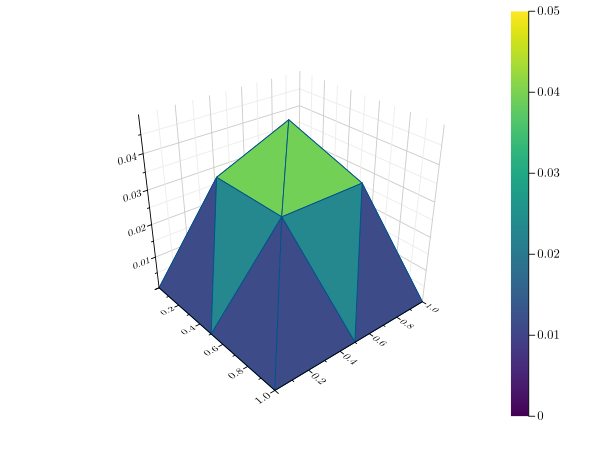

In [73]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square-2nd.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
sourcefunction(x,y) = x+y

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][6*(element_id-1)+1]
  node2_id = element_connectivity[1][6*(element_id-1)+2]
  node3_id = element_connectivity[1][6*(element_id-1)+3]
  node4_id = element_connectivity[1][6*(element_id-1)+4]
  node5_id = element_connectivity[1][6*(element_id-1)+5]
  node6_id = element_connectivity[1][6*(element_id-1)+6]    
  I = Vector{Int64}([node1_id; node2_id; node3_id; node4_id; node5_id; node6_id])
  # display(I)
    
  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  xnode4 = xnode[node4_id]; xnode5 = xnode[node5_id]; xnode6 = xnode[node6_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];
  ynode4 = ynode[node4_id]; ynode5 = ynode[node5_id]; ynode6 = ynode[node6_id];
  x1 = [xnode1, ynode1]; x2 = [xnode2, ynode2]; x3 = [xnode3, ynode3];  
  x4 = [xnode4, ynode4]; x5 = [xnode5, ynode5]; x6 = [xnode6, ynode6];  

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....computation of the coefficients of the basis functions 
  x = [x1, x2, x3, x4, x5, x6]
  X = [[x1[1]^2, x1[2]^2, x1[1]*x1[2], x1[1], x1[2], 1] for x1 in x]
  X = reduce(vcat,transpose(X))
  Emat = X\UniformScaling(1.)
   
  #....transform quadrature points to physical domain    
  T = zeros(2,2); T[:,1] = x2 - x1; T[:,2] = x3 - x1; 
  xs = [T*xi1+x1 for xi1 in xi];

  #....construct Vandermonde Matrix for evaluation of the basis functions
  Xs = zeros(length(w),6);   
  Xs = [[xs1[1]^2, xs1[2]^2, xs1[1]*xs1[2], xs1[1], xs1[2], 1] for xs1 in xs];
  Xs = reduce(vcat,transpose(Xs))
    
  #....construct Vandermonde Matrix for evaluation of the x/y derivatives of basis functions
  dxXs = zeros(length(w),6);
  dxXs = [[2*xs1[1], 0 , xs1[2], 1, 0, 0] for xs1 in xs];
  dxXs = reduce(vcat,transpose(dxXs))
  dyXs = zeros(length(w),6);
  dyXs = [[0, 2*xs1[2], xs1[1], 0, 1, 0] for xs1 in xs];
  dyXs = reduce(vcat,transpose(dyXs))
    
  #....coonstruct column matrices of basis functions and derivatives of the basis functions   
  Phi   = Xs*Emat; 
  dxPhi = dxXs*Emat; 
  dyPhi = dyXs*Emat; 

  #....compute contributions to the local mass and stiffness matrix   
  PhiPhi = zeros(length(w),36);
  [PhiPhi[:,(j-1)*6+i] = Phi[:,i].*Phi[:,j] for i=1:6,j=1:6];
  dxPhidxPhi = zeros(length(w),36);
  [dxPhidxPhi[:,(j-1)*6+i] = dxPhi[:,i].*dxPhi[:,j] for i=1:6,j=1:6];
  dyPhidyPhi = zeros(length(w),36);
  [dyPhidyPhi[:,(j-1)*6+i] = dyPhi[:,i].*dyPhi[:,j] for i=1:6,j=1:6];
  dPhidPhi = dxPhidxPhi + dyPhidyPhi; 
  Mloc = 2*area_id*Transpose(w)*PhiPhi
  Aloc = 2*area_id*Transpose(w)*dPhidPhi
  Aloc = reshape(Aloc,6,6)  
    
  #....compute local vector contribution floc 
  fvaluesloc = [sourcefunction(xi[i][1],xi[i][2]) for i=1:length(xi)] 
  fvaluesloc = repeat(fvaluesloc,outer=(1,6))
  floc = 2*area_id*Transpose(w)*(fvaluesloc.*Phi)  
  floc = Transpose(floc)
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  f[I] += floc
  A[I,I] += Aloc
#  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
display(A[bnd_node_ids,bnd_node_ids])

#..10/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/12 Plot the numerical solution
GR.trisurf(xnode,ynode,u)